<a href="https://colab.research.google.com/github/maxgomezt/maxgomezt/blob/main/deep_learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
drive  gdrive  sample_data


In [5]:
%cd gdrive/My\ Drive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/
!ls

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3
checkpoints		  IMAGES	     README.md
Collect_training_data.py  LICENSE	     requirements.txt
datasets		  log		     tools
deep_sort		  mAP		     train.py
detection_custom.py	  mnist		     yolov3
detection_demo.py	  model_data	     YOLOv3_colab_training.ipynb
detect_mnist.py		  object_tracker.py
evaluate_mAP.py		  __pycache__


In [6]:
!pip install -r ./requirements.txt

  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached opencv-python-4.4.0.46.tar.gz (88.9 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [4]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2023-10-11 19:20:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights.7’

yolov3.weights.7    100%[===================>] 236.52M  34.1MB/s    in 6.5s    

2023-10-11 19:20:10 (36.1 MB/s) - ‘model_data/yolov3.weights.7’ saved [248007048/248007048]



In [11]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.13.0


'/device:GPU:0'

In [14]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

1/1 [==============================] - 8s 8s/step


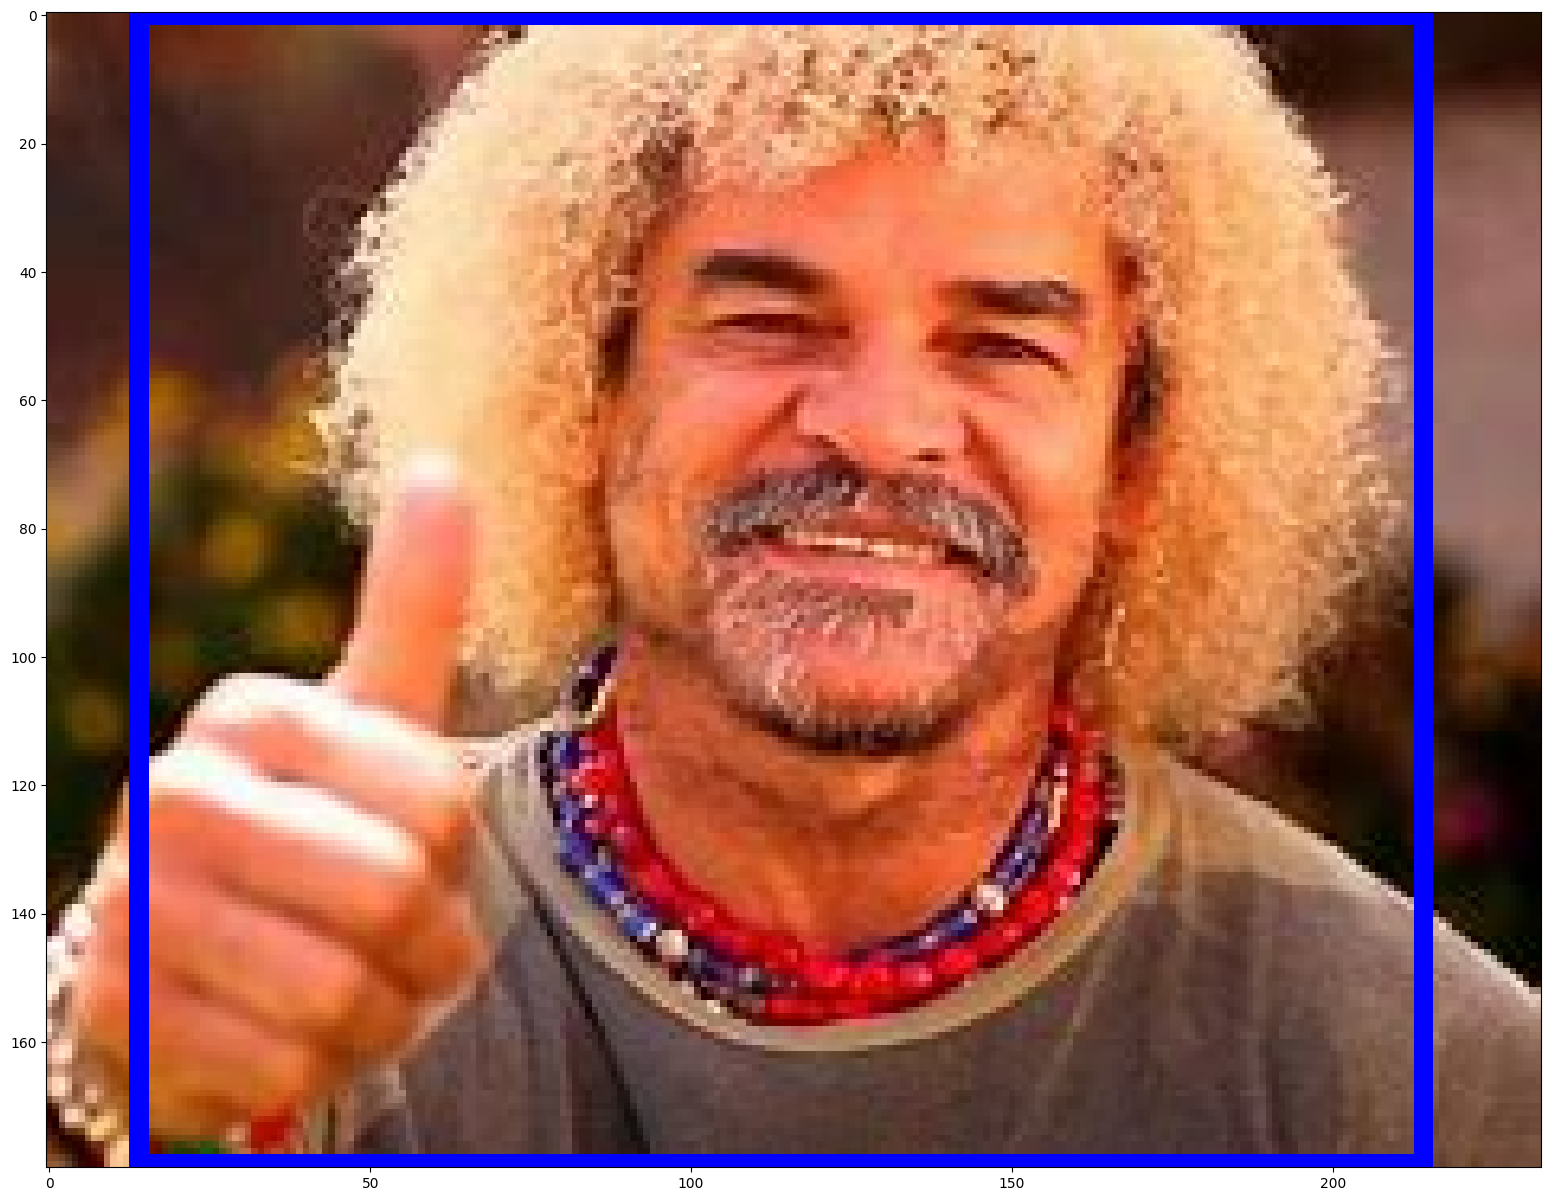

In [16]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/fredy4.jpg 98,1,167,91,0
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/OIP5.jpg 148,2,193,61,0
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/fredy3.jpg 85,1,128,53,0
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/fredy1.jpg 118,2,233,148,0 0,6,57,111,1
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/OIP1.jpg 217,59,265,120,0
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/OIP.jpg 183,8,258,105,0
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/fredy5.jpg 183,1,241,85,0
/content/gdrive/MyDrive/TensorFlow-2.x-YOLOv3/TensorFlow-2.x-YOLOv3/datasets/train/fredy2.jpg 17,0,79,79,0
/content/gdrive/MyDrive/TensorFlow-2.x-

In [17]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15367832895396419452
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14357954560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 488533745649979092
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
RuntimeError in tf.config.experimental.list_physical_devices('GPU')
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58


epoch: 0 step:    2/9, lr:0.000011, giou_loss:   2.10, conf_loss:1702.13, prob_loss:   5.03, total_loss:1709.27
epoch: 0 step:    3/9, lr:0.000017, giou_loss:   3.37, conf_loss:1211.66, prob_loss:   6.74, total_loss:1221.77
epoch: 0 step:    4/9, lr:0.000022, giou_loss:   2.63, conf_loss:1192.18, prob_loss:   5.83, total_loss:1200.64
epoch: 0 step:    5/9, lr:0.000028, giou_loss:   3.64, conf_loss:1176.47, prob_loss:   7.78, total_loss:1187.88
epoch: 0 step:    6/9, lr:0.000033, giou_loss:   4.70, conf_loss:1153.09, prob_loss:   8.75, total_loss:1166.54
epoch: 0 step:    7/9, lr:0.000039, giou_loss:   3.31, conf_loss:1123.59, prob_loss:   7.63, total_loss:1134.53
epoch: 0 step:    8/9, lr:0.000044, giou_loss:   2.11, conf_loss:1096.71, prob_loss:   4.33, total_loss:1103.15
epoch: 0 step:    0/9, lr:0.000050, giou_loss:   2.99, conf_loss:1070.06, prob_loss:   6.32, total_loss:1079.37
epoch: 0 step:    1/9, lr:0.000056, giou_loss:   2.98, conf_loss:1043.54, prob_loss:   6.21, total_loss:

In [7]:
!python train.py

2023-10-11 19:22:14.342268: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-11 19:22:17.335831: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10168849559559756114
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13984661504
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3961682395597702653
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
skipping conv2d_74
skipping conv2d_66
skipping conv2d_58
epoch: 0 step:    2/9, lr:0.000011, giou_loss:   3.32, conf_loss:1576.92, prob_loss:   6.83, total_loss:1587.07
epoch: 0 step:    3

In [37]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

1/1 [==============================] - 2s 2s/step


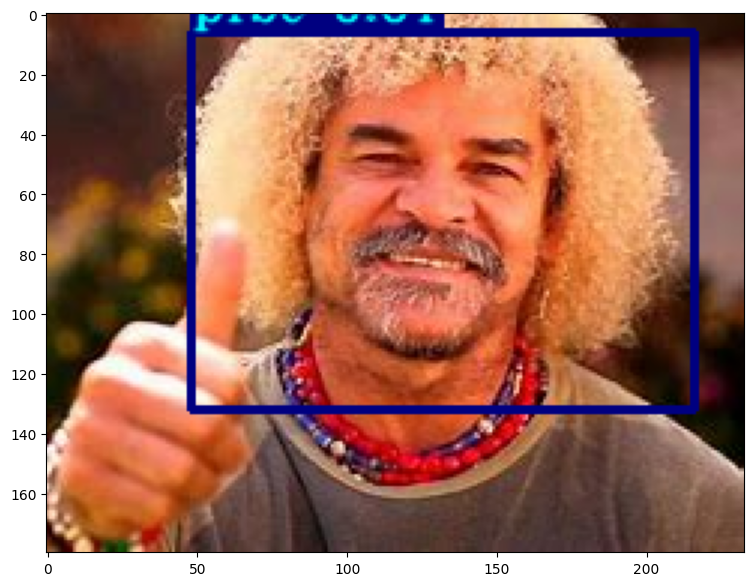

In [38]:
image_path   = "./IMAGES/pruebapibe fredy.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,7))
plt.imshow(image)

In [13]:
!python detection_custom.py

2023-10-11 20:09:13.116191: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Loading custom weights from: ./checkpoints/yolov3_custom
1/1 [==============================] - 4s 4s/step
